<a href="https://colab.research.google.com/github/RZDN/Complejidad_Algoritmica_RZD/blob/main/PREGUNTA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [23]:
from algorithmic_complexity.aclib import graphstuff as gs
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as hq

In [88]:
#G = nx.Graph()
#G.add_edge(0, 1, weight=5 )
#G.add_edge(0, 2, weight=6 )
#G.add_edge(1, 2, weight=3 )
#G.add_edge(1, 3, weight=2 )
#G.add_edge(2, 3, weight=4 )

%%file 1.csv
0 1 5
0 2 6
1 2 3
1 3 2
2 3 4

Overwriting 1.csv


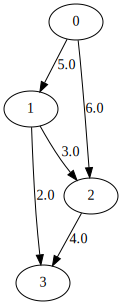

In [90]:
G = nx.read_weighted_edgelist('1.csv', create_using=nx.DiGraph, delimiter=' ', nodetype=int)
gs.nx2gv(G, weighted=True, params={'size':'30'})

In [72]:
def Problema01(G, s):
  for u in G.nodes:
    G.nodes[u]['visitado'] = False
    G.nodes[u]['padre'] = -1

  mayor = 0
  total = 0
  stack = [s]
  while stack:
    u = stack.pop()
    if not G.nodes[u]['visitado']:
      G.nodes[u]['visitado'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visitado']:
          premio = G.edges[u, v]['weight']
          if premio > mayor:
            mayor = premio 
            G.nodes[v]['padre'] = u        
            stack.append(v)
          else:
            mayor = premio
            G.nodes[v]['padre'] = u
            stack.append(v)
        
      total += mayor
      mayor = 0

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[int(v)] = int(info['padre'])

  return path, total

12


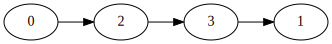

In [73]:
path, premio = Problema01(G, 0)
print(premio)

gs.path2gv(path)